In [95]:
import pandas as pd
import numpy as np
import warnings
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
#import psycopg2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression

# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [96]:
pip install -U airportsdata

Note: you may need to restart the kernel to use updated packages.


In [97]:
import airportsdata
# Load the airports data
airports = airportsdata.load()

# Convert the airports data into a DataFrame
airports_df = pd.DataFrame(airports)
airports_df


,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
icao,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
iata,,,,,,,,,,,...,NDG,,DLC,TNH,SHE,XEN,YNJ,,AYM,OUK
name,Aero B Ranch Airport,Lowell Field,Epps Airpark,Katmai Lodge Airport,Arland Airport,Fulton Airport,Goldstone /Gts/ Airport,Williams Ag Airport,Grass Patch Airport,River Oak Airport,...,Qiqihar Sanjiazi Airport,Tahe Airport,Zhoushuizi Airport,Tonghua Sanyuanpu Airport,Taoxian Airport,Xingcheng Air Base,Yanji Chaoyangchuan Airport,Shenyang Dongta Airport,Yas Island Seaplane Base,Out Skerries Airstrip
city,Leoti,Anchor Point,Harvest,King Salmon,Bennington,Alex,Barstow,Biggs,Bushnell,Okeechobee,...,Qiqihar,Tahe,Dalian,Tonghua,Shenyang,,Yanji,Shenyang,Yas Island,Shetland
subd,Kansas,Alaska,Alabama,Alaska,Kansas,Oklahoma,California,California,Florida,Florida,...,Heilongjiang,Heilongjiang,Liaoning,Jilin,Liaoning,Liaoning,Jilin,Liaoning,Abu Dhabi,Scotland
country,US,US,US,US,US,US,US,US,US,US,...,CN,CN,CN,CN,CN,CN,CN,CN,AE,GB
elevation,3435.0,252.0,820.0,80.0,1352.0,1100.0,3038.0,87.0,53.0,35.0,...,477.0,1240.0,107.0,1200.0,198.0,30.0,624.0,0.0,0.0,20.0
lat,38.704022,59.948889,34.86481,59.093472,38.969651,34.942803,35.354972,39.427189,28.645547,27.23088,...,47.239601,52.224444,38.965698,42.253889,41.639801,40.580299,42.882801,41.784401,24.467,60.425583
lon,-101.473911,-151.692222,-86.770278,-156.455833,-97.601557,-97.818019,-116.885208,-121.763428,-82.218975,-80.969231,...,123.917999,124.720222,121.539001,125.703333,123.483002,120.697998,129.451004,123.496002,54.6103,-0.7466
tz,America/Chicago,America/Anchorage,America/Chicago,America/Anchorage,America/Chicago,America/Chicago,America/Los_Angeles,America/Los_Angeles,America/New_York,America/New_York,...,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Dubai,Europe/London


In [98]:
# Transpose the DataFrame
airports_df = airports_df.transpose()
# If you want to reset the index of the transposed DataFrame
airports_df.reset_index(drop=True, inplace=True)

In [344]:
airports_df.columns

Index(['icao', 'iata', 'name', 'city', 'subd', 'country', 'elevation', 'lat',
       'lon', 'tz', 'lid'],
      dtype='object')

In [341]:
df_train = pd.read_csv('data/train.csv')
df_train.shape
df = df_train.copy()
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [349]:
# Selecting required columns from airports_df1
selected_airports_df = airports_df[['elevation','lat', 'lon','iata']]

# Merge for departure airport details
df1 = df.merge(selected_airports_df.rename(columns={'lat': 'dep_lat', 'lon': 'dep_lon', 'elevation': 'dep_elvation'}),
              left_on='DEPSTN', right_on='iata', how='left')

# # # Merge for arrival airport details
df2 = df1.merge(selected_airports_df.rename(columns={'lat': 'arr_lat', 'lon': 'arr_lon', 'elevation': 'arr_elvation'}),
             left_on='ARRSTN', right_on='iata', how='left')

# # # Drop the redundant 'iata' columns
# # #df.drop(['iata_x', 'iata_y'], axis=1, inplace=True)

# # # Optionally, drop other redundant columns if necessary
# # # df.drop(['DEPSTN_x', 'ARRSTN_x', 'DEPSTN_y', 'ARRSTN_y'], axis=1, inplace=True)

# # # Display the updated DataFrame
df2.drop(['iata_x', 'iata_y'], axis=1, inplace=True)
df2

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_elvation,dep_lat,dep_lon,arr_elvation,arr_lat,arr_lon
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,656.0,33.3675,-7.58997,22.0,36.851002,10.2272
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,768.0,45.6306,8.72811,22.0,36.851002,10.2272
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,22.0,36.851002,10.2272,325.0,41.275333,28.752
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,19.0,33.875,10.7755,90.0,47.153198,-1.61073
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,22.0,36.851002,10.2272,82.0,36.691002,3.21541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,22.0,36.851002,10.2272,22.0,36.851002,10.2272
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,19.0,33.875,10.7755,22.0,36.851002,10.2272
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,22.0,36.851002,10.2272,22.0,36.851002,10.2272
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,22.0,36.851002,10.2272,19.0,33.875,10.7755


In [350]:
df = df2.copy()

In [351]:

# Convert DATOP column to datetime format
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Extract year, month, day, and week
df['Year'] = df['DATOP'].dt.year
df['Month'] = df['DATOP'].dt.month
df['Day'] = df['DATOP'].dt.day
df['Weekday'] = df['DATOP'].dt.dayofweek  # Monday=0, Sunday=6

# Reorder columns
#df = df[['FLTID','DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC', 'target']]


df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_elvation,dep_lat,dep_lon,arr_elvation,arr_lat,arr_lon,Year,Month,Day,Weekday
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,656.0,33.3675,-7.58997,22.0,36.851002,10.2272,2016,1,3,6
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,768.0,45.6306,8.72811,22.0,36.851002,10.2272,2016,1,13,2
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,22.0,36.851002,10.2272,325.0,41.275333,28.752,2016,1,16,5
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,19.0,33.875,10.7755,90.0,47.153198,-1.61073,2016,1,17,6
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,22.0,36.851002,10.2272,82.0,36.691002,3.21541,2016,1,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,22.0,36.851002,10.2272,22.0,36.851002,10.2272,2018,7,5,3
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,19.0,33.875,10.7755,22.0,36.851002,10.2272,2018,1,13,5
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,22.0,36.851002,10.2272,22.0,36.851002,10.2272,2018,11,7,2
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,22.0,36.851002,10.2272,19.0,33.875,10.7755,2018,1,23,1


In [352]:
# Convert STD and STA columns to datetime objects with correct format
df['STD'] = pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] = pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

# Calculate flight duration in minutes
df['Flight_Duration'] = (df['STA'] - df['STD']).dt.total_seconds() / 60

df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,dep_lat,dep_lon,arr_elvation,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,33.3675,-7.58997,22.0,36.851002,10.2272,2016,1,3,6,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,...,45.6306,8.72811,22.0,36.851002,10.2272,2016,1,13,2,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,36.851002,10.2272,325.0,41.275333,28.752,2016,1,16,5,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,33.875,10.7755,90.0,47.153198,-1.61073,2016,1,17,6,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,...,36.851002,10.2272,82.0,36.691002,3.21541,2016,1,17,6,80.0


In [353]:
# Split STD column into date and time columns
df['STD_Date'] = pd.to_datetime(df['STD']).dt.date
df['STD_Time'] = pd.to_datetime(df['STD']).dt.time

# Split STA column into date and time columns
df['STA_Date'] = pd.to_datetime(df['STA']).dt.date
df['STA_Time'] = pd.to_datetime(df['STA']).dt.time

# Drop the original STD and STA columns
df.drop(columns=['STD', 'STA'], inplace=True)

# Print the DataFrame to verify the changes
df


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_elvation,dep_lat,...,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,656.0,33.3675,...,10.2272,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,768.0,45.6306,...,10.2272,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,train_id_2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,22.0,36.851002,...,28.752,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,19.0,33.875,...,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,22.0,36.851002,...,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,22.0,36.851002,...,10.2272,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,19.0,33.875,...,10.2272,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,22.0,36.851002,...,10.2272,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,22.0,36.851002,...,10.7755,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [355]:
# Define mapping dictionary
status_mapping = {'ATA': 0, 'DEP': 1, 'RTR': 2, 'SCH': 3, 'DEL': 4}

# Map the values in the 'STATUS' column using the mapping dictionary
df['STATUS'] = df['STATUS'].map(status_mapping)

# Print the unique values in the 'STATUS' column
print(df['STATUS'].unique()) 

[0 1 2 3 4]


In [359]:
# Convert 'dep_lat' and 'dep_lon' to numerical values
df['dep_lat'] = pd.to_numeric(df['dep_lat'])
df['dep_lon'] = pd.to_numeric(df['dep_lon'])
df['dep_elvation'] = pd.to_numeric(df['dep_elvation'])

# Convert 'arr_lat' and 'arr_lon' to numerical values
df['arr_lat'] = pd.to_numeric(df['arr_lat'])
df['arr_lon'] = pd.to_numeric(df['arr_lon'])
df['arr_elvation'] = pd.to_numeric(df['arr_elvation'])

In [360]:
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_elvation,dep_lat,...,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,0,TU 32AIMN,260.0,656.0,33.367500,...,10.22720,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,0,TU 31BIMO,20.0,768.0,45.630600,...,10.22720,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,train_id_2,2016-01-16,TU 0214,TUN,IST,0,TU 32AIMN,0.0,22.0,36.851002,...,28.75200,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,0,TU 736IOK,0.0,19.0,33.875000,...,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,0,TU 320IMU,22.0,22.0,36.851002,...,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,3,TU 32AIML,0.0,22.0,36.851002,...,10.22720,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,3,UG AT7AT7,0.0,19.0,33.875000,...,10.22720,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,3,TU 736IOK,0.0,22.0,36.851002,...,10.22720,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,0,TU CR9ISA,0.0,22.0,36.851002,...,10.77550,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               107833 non-null  object        
 1   DATOP            107833 non-null  datetime64[ns]
 2   FLTID            107833 non-null  object        
 3   DEPSTN           107833 non-null  object        
 4   ARRSTN           107833 non-null  object        
 5   STATUS           107833 non-null  int64         
 6   AC               107833 non-null  object        
 7   target           107833 non-null  float64       
 8   dep_elvation     107501 non-null  float64       
 9   dep_lat          107501 non-null  float64       
 10  dep_lon          107501 non-null  float64       
 11  arr_elvation     107501 non-null  float64       
 12  arr_lat          107501 non-null  float64       
 13  arr_lon          107501 non-null  float64       
 14  Year             107

In [362]:
df.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STATUS', 'AC', 'target',
       'dep_elvation', 'dep_lat', 'dep_lon', 'arr_elvation', 'arr_lat',
       'arr_lon', 'Year', 'Month', 'Day', 'Weekday', 'Flight_Duration',
       'STD_Date', 'STD_Time', 'STA_Date', 'STA_Time'],
      dtype='object')

In [363]:
df = df.drop(['ID','DATOP', 'FLTID', 'DEPSTN', 'ARRSTN','AC', 'Year','STD_Date', 'STD_Time', 'STA_Date',
       'STA_Time'], axis =1) #'DATOP'

In [364]:
df

,STATUS,target,dep_elvation,dep_lat,dep_lon,arr_elvation,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,0,260.0,656.0,33.367500,-7.58997,22.0,36.851002,10.22720,1,3,6,145.0
1,0,20.0,768.0,45.630600,8.72811,22.0,36.851002,10.22720,1,13,2,110.0
2,0,0.0,22.0,36.851002,10.22720,325.0,41.275333,28.75200,1,16,5,155.0
3,0,0.0,19.0,33.875000,10.77550,90.0,47.153198,-1.61073,1,17,6,170.0
4,0,22.0,22.0,36.851002,10.22720,82.0,36.691002,3.21541,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107828,3,0.0,22.0,36.851002,10.22720,22.0,36.851002,10.22720,7,5,3,180.0
107829,3,0.0,19.0,33.875000,10.77550,22.0,36.851002,10.22720,1,13,5,60.0
107830,3,0.0,22.0,36.851002,10.22720,22.0,36.851002,10.22720,11,7,2,470.0
107831,0,0.0,22.0,36.851002,10.22720,19.0,33.875000,10.77550,1,23,1,45.0


In [115]:
df.describe()

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
count,107833.000000,107833.000000,107501.000000,107501.000000,107501.000000,107501.000000,107833.000000,107833.000000,107833.000000,107833.000000
mean,0.383788,48.733013,38.472802,8.751242,38.474117,8.753088,6.681211,15.956396,3.124999,222.629687
std,0.997781,117.135562,7.654765,8.453875,7.652201,8.454613,3.292267,8.884317,2.026583,5077.970136
min,0.000000,0.000000,-11.591300,-73.740799,-11.591300,-73.740799,1.000000,1.000000,0.000000,10.000000
25%,0.000000,0.000000,35.857498,5.221424,35.857498,5.221424,4.000000,8.000000,1.000000,95.000000
50%,0.000000,14.000000,36.851002,10.227200,36.851002,10.227200,7.000000,16.000000,3.000000,140.000000
75%,0.000000,43.000000,43.629101,10.691000,43.629101,10.691000,9.000000,24.000000,5.000000,165.000000
max,4.000000,3451.000000,63.985001,51.613766,59.800301,51.613766,12.000000,31.000000,6.000000,719520.000000


In [117]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: >

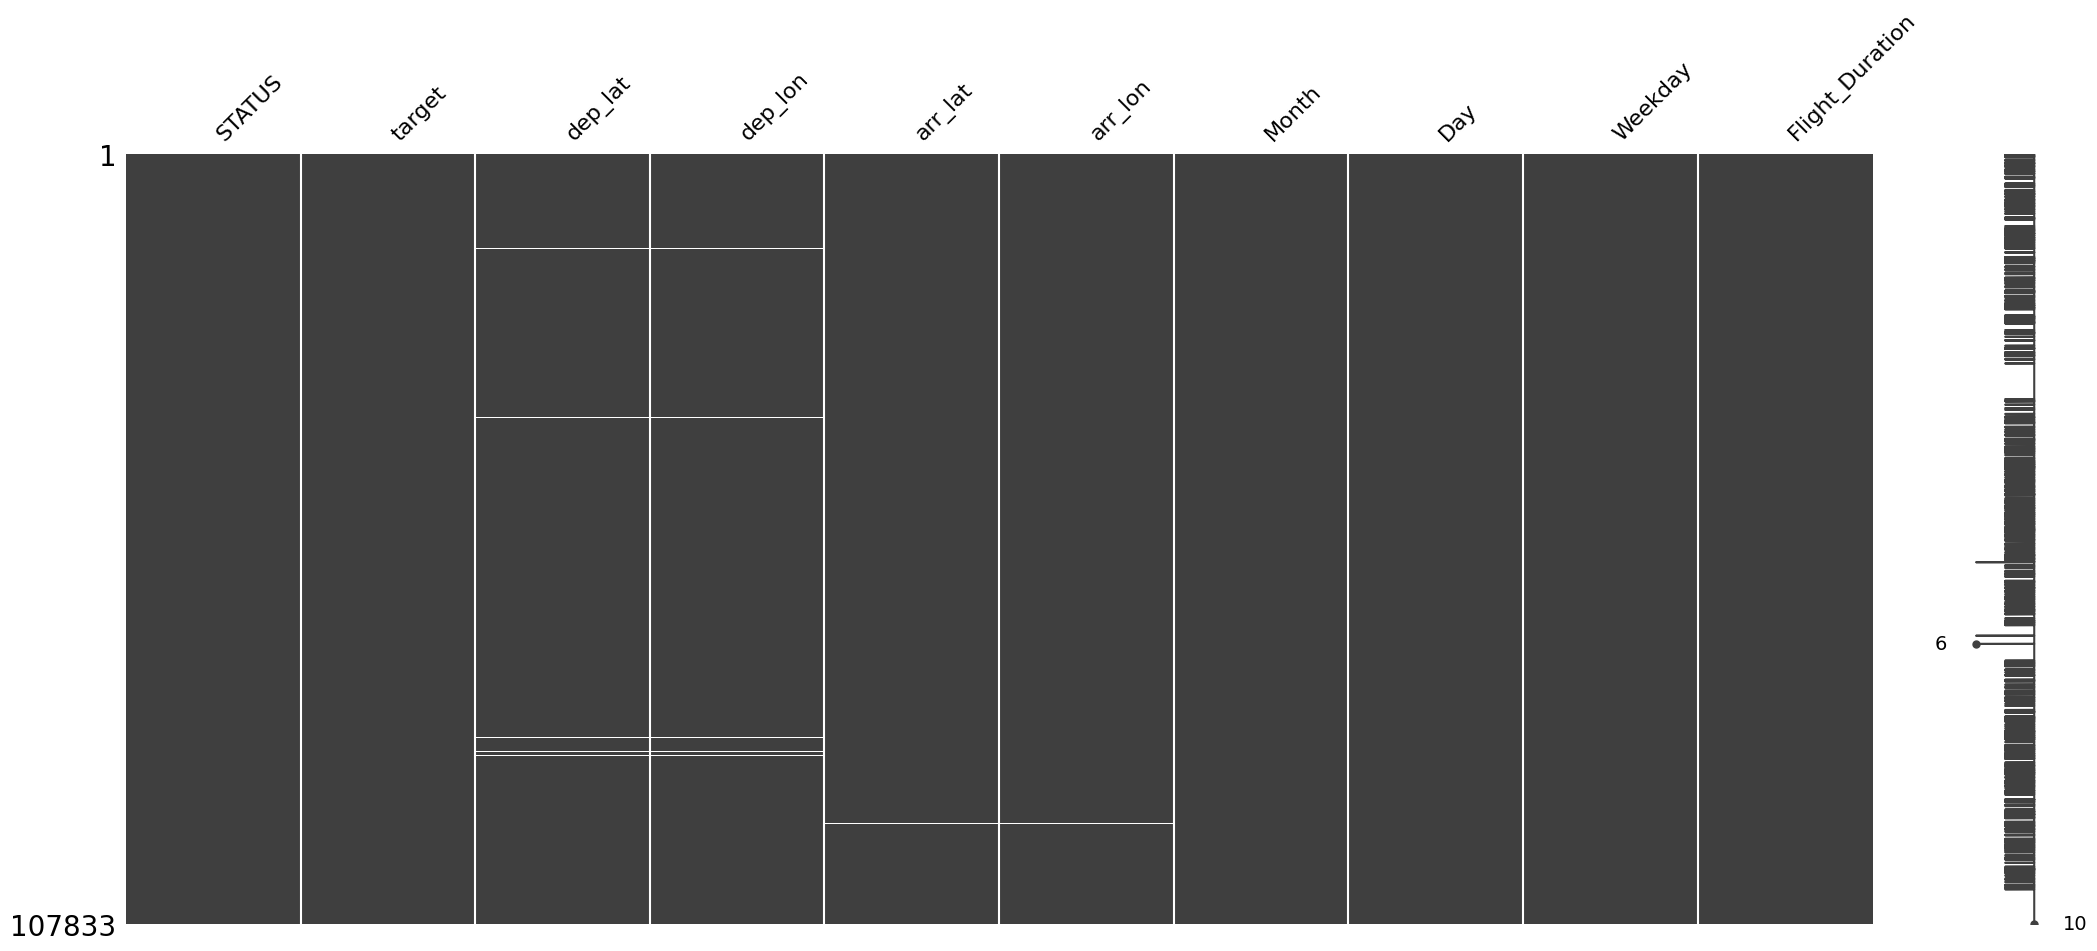

In [118]:
import missingno as msno

# Visualize missing values using the matrix plot
msno.matrix(df)

In [369]:
# Drop rows with null values
df.dropna(inplace=True)

# Check for null values after dropping
print(df.isnull().sum())

STATUS             0
target             0
dep_elvation       0
dep_lat            0
dep_lon            0
arr_elvation       0
arr_lat            0
arr_lon            0
Month              0
Day                0
Weekday            0
Flight_Duration    0
dtype: int64


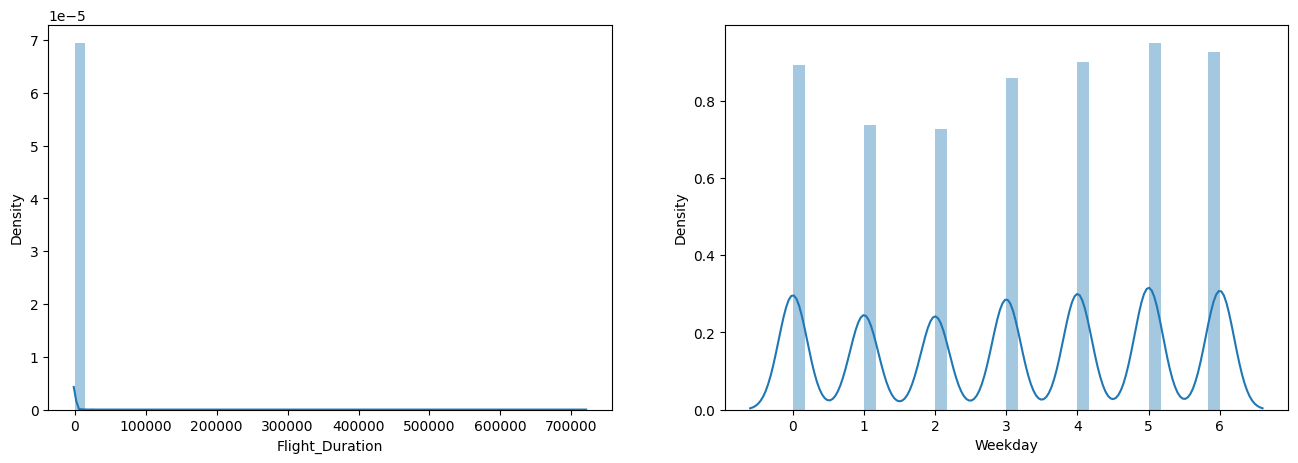

In [186]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Flight_Duration'])

plt.subplot(1,2,2)
sns.distplot(df['Weekday'])

plt.show()

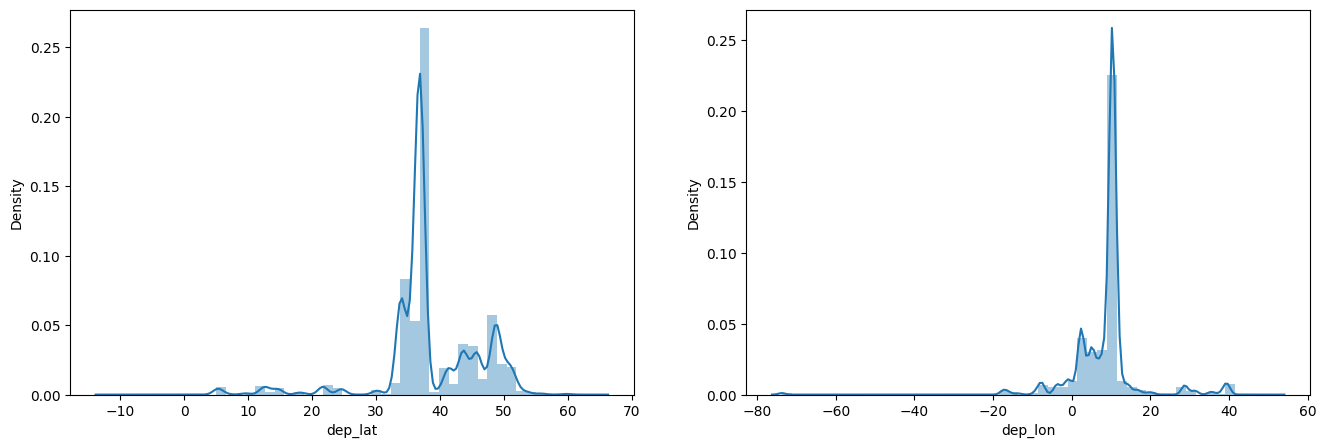

In [121]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['dep_lat'])

plt.subplot(1,2,2)
sns.distplot(df['dep_lon'])

plt.show()

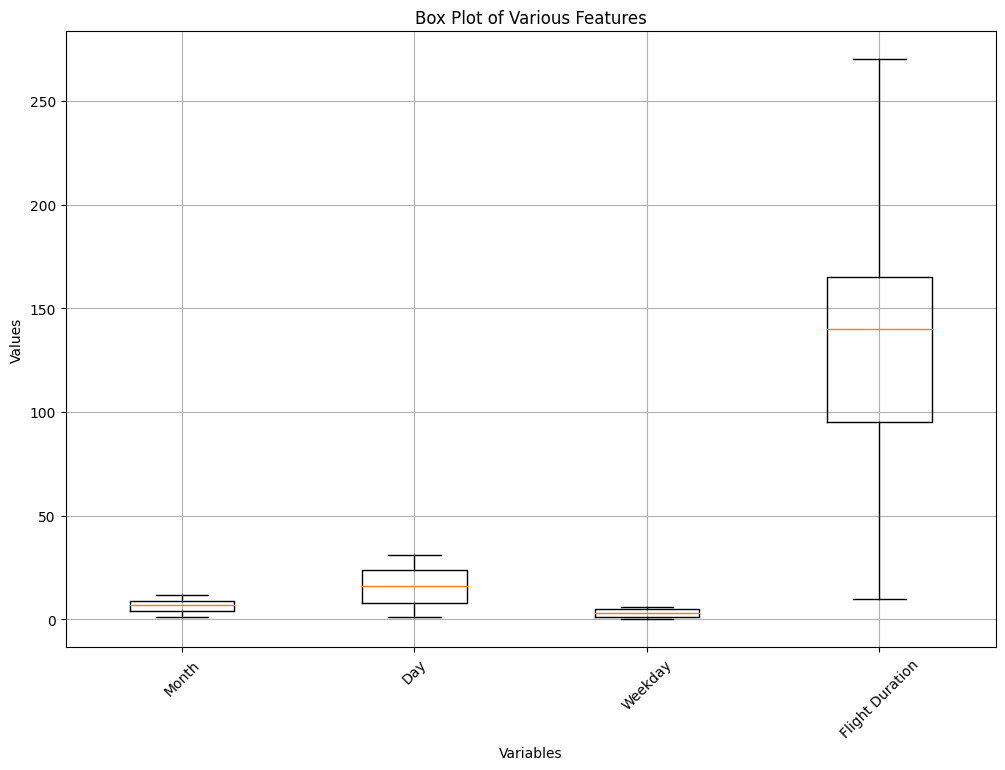

In [450]:
import matplotlib.pyplot as plt

# Define the data
data = [
    df['Month'], df['Day'], df['Weekday'], df['Flight_Duration']
]
labels = [
    'Month', 'Day', 'Weekday', 'Flight Duration'
]

# Create box plots
plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)
plt.title('Box Plot of Various Features')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


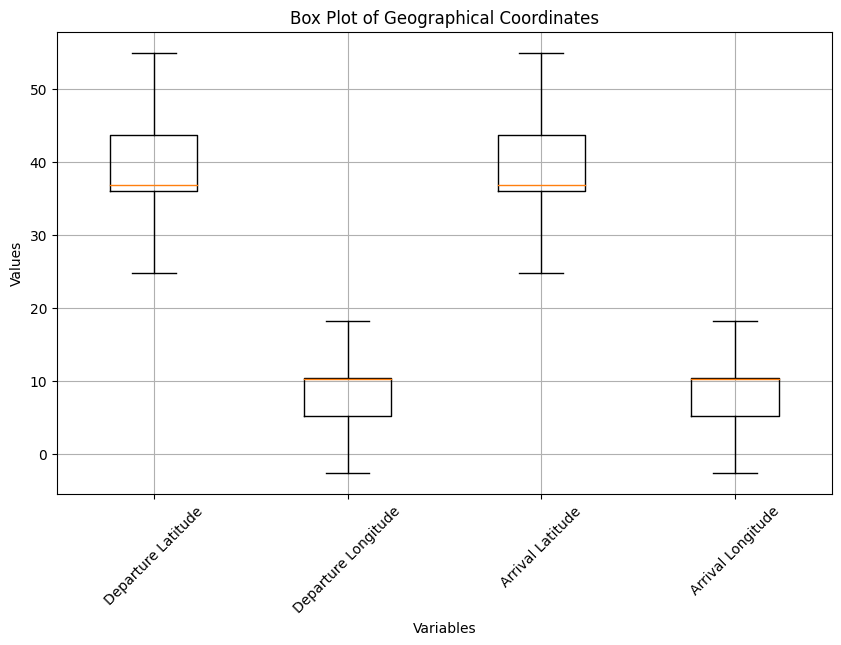

In [451]:
import matplotlib.pyplot as plt

# Define the data
data = [df['dep_lat'], df['dep_lon'], df['arr_lat'], df['arr_lon']]

labels = ['Departure Latitude', 'Departure Longitude', 'Arrival Latitude', 'Arrival Longitude'] #

# Create box plots
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Box Plot of Geographical Coordinates')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [293]:
print(df['dep_lat'].skew()) # -1.112The data is said to be left-skewed or negatively skewed
print(df['dep_lon'].skew())
print(df['arr_lat'].skew())
print(df['arr_lon'].skew())
# print(df['Month'].skew())
# print(df['Day'].skew())
# print(df['Weekday'].skew())
print(df['Flight_Duration'].skew())

0.24882116336995266
-0.6242963918918469
0.2488436053343823
-0.6234823023473735
0.5836770464657881


In [370]:
# Calculate the quartiles
Q1 = df[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']].quantile(0.25)
Q3 = df[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = ((df[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']] < lower_bound) | (df[['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']] > upper_bound)).any(axis=1)

# Replace outliers with the upper or lower bound
df.loc[outliers, ['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']] = df.loc[outliers, ['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon','Flight_Duration']].clip(lower=lower_bound, upper=upper_bound, axis=1)


In [141]:
df.columns

Index(['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month',
       'Day', 'Weekday', 'Flight_Duration'],
      dtype='object')

In [394]:
corr_matrix

#dep_lat and arr_lon have a correlation coefficient of 0.209, 
#indicating some level of correlation between them.



,STATUS,target,dep_elvation,dep_lat,dep_lon,arr_elvation,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
STATUS,1.000000,-0.156253,-0.135343,-0.163689,0.149032,-0.138317,-0.161272,0.145744,-0.027202,-0.004979,-0.050282,-0.122832
target,-0.156253,1.000000,0.042227,0.013469,-0.044141,0.017339,-0.019924,-0.009993,0.020849,0.005214,0.038553,0.058854
dep_elvation,-0.135343,0.042227,1.000000,0.191205,-0.169730,-0.185430,-0.203463,0.121010,0.000722,0.003548,-0.018174,0.102292
dep_lat,-0.163689,0.013469,0.191205,1.000000,-0.221891,-0.201011,-0.139306,0.208654,0.035908,-0.000418,0.029720,-0.064997
dep_lon,0.149032,-0.044141,-0.169730,-0.221891,1.000000,0.122108,0.208153,-0.014321,-0.026577,0.001436,-0.011069,0.007943
arr_elvation,-0.138317,0.017339,-0.185430,-0.201011,0.122108,1.000000,0.191370,-0.169856,0.001501,0.003232,-0.005531,0.092922
arr_lat,-0.161272,-0.019924,-0.203463,-0.139306,0.208153,0.191370,1.000000,-0.221732,0.036013,-0.000192,0.011969,-0.057268
arr_lon,0.145744,-0.009993,0.121010,0.208654,-0.014321,-0.169856,-0.221732,1.000000,-0.026460,0.000430,-0.035914,-0.025602
Month,-0.027202,0.020849,0.000722,0.035908,-0.026577,0.001501,0.036013,-0.026460,1.000000,0.009244,0.005791,0.002875
Day,-0.004979,0.005214,0.003548,-0.000418,0.001436,0.003232,-0.000192,0.000430,0.009244,1.000000,-0.009263,0.001021


In [214]:
# Set the threshold for feature selection (e.g., absolute correlation coefficient > 0.1)
threshold = 0.01

# Identify independent features based on correlation
independent_features = corr_matrix[corr_matrix['target'].abs() > threshold].index.tolist()

# Print the selected independent features
print("Independent Features:")
print(independent_features)

Independent Features:
['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'Month', 'Weekday', 'Flight_Duration']


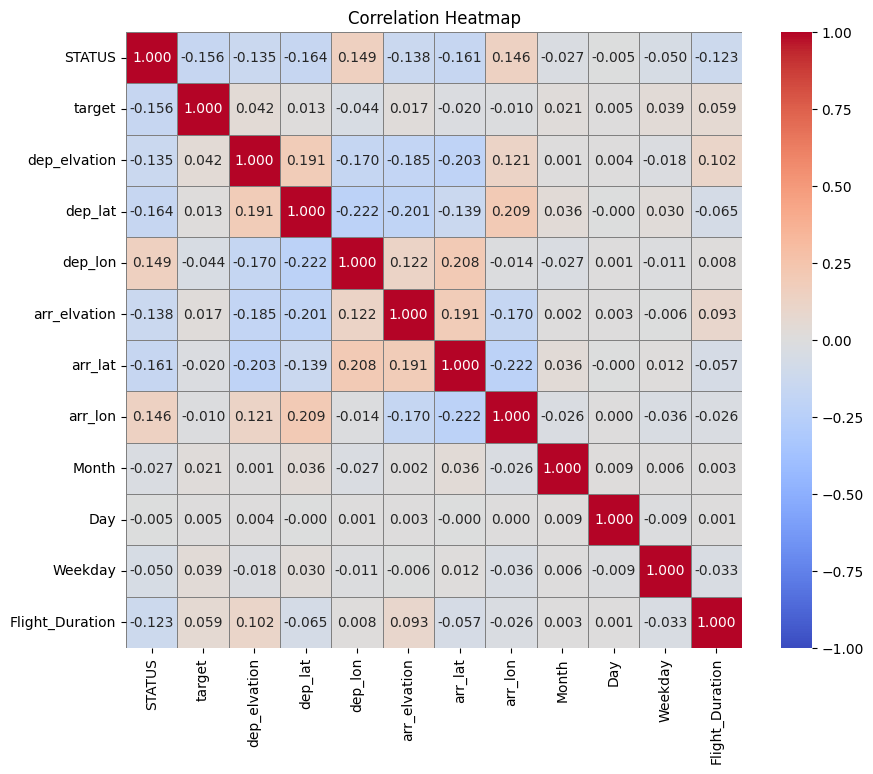

In [371]:
# Generate correlation matrix
corr_matrix = df.corr()

# Create heatmap with adjusted annotation size
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1, fmt=".3f", cmap="coolwarm", linewidths=0.5, linecolor='grey', cbar=True, square=True)

plt.title('Correlation Heatmap')  # Add title to the heatmap
plt.show()

In [393]:

df_corr = pd.DataFrame(corr_matrix)

# Filter features that have correlation > 0.1 with the target
high_corr_features = df_corr[df_corr['target'].abs() > 0.1]

# Remove features that have correlation > 0.5 with other features
independent_features = high_corr_features.loc[:, (high_corr_features.abs() < 0.5).all()]

# Print the independent features
print("Independent features:")
print(independent_features.columns.tolist())

Independent features:
['STATUS', 'dep_elvation', 'dep_lat', 'dep_lon', 'arr_elvation', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']


In [57]:
independent_features

,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
STATUS,-0.137953,0.126367,-0.135396,0.124605,-0.035192,-0.004975,-0.050411,0.114399
target,0.024297,-0.064302,-0.022344,-0.037339,0.025617,0.008694,0.048294,-0.017206


In [374]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define the number of features to select
k = 5  # Example: Select the top 5 features

# Initialize SelectKBest with the desired statistical test
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to your data and transform the features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['dep_elvation', 'dep_lon', 'Month', 'Weekday', 'Flight_Duration'], dtype='object')


In [396]:
# Sort the absolute correlation values for the target variable in descending order
target_correlation = df_corr['target'].abs().sort_values(ascending=False)
target_correlation

target                     1.000000
STATUS                     0.155119
Arrival_Hour               0.092989
Year                       0.086905
AC_Encoded                 0.078536
Departure_Hour             0.060898
Dep_Time_of_Day_Encoded    0.058791
dep_elvation               0.042071
Weekday                    0.038514
Weekend                    0.036652
arr_lat                    0.024523
Month                      0.020645
arr_elvation               0.017094
dep_lon                    0.010315
arr_lon                    0.006347
Flight_Duration            0.006306
dep_lat                    0.005952
Day                        0.005621
Airline_Encoded            0.002651

target             1.000000
STATUS             0.156253
Flight_Duration    0.058854
dep_lon            0.044141
dep_elvation       0.042227
Weekday            0.038553
Month              0.020849
arr_lat            0.019924
arr_elvation       0.017339
dep_lat            0.013469
arr_lon            0.009993
Day                0.005214
Name: target, dtype: float64

In [443]:
#X = df[['dep_lat', 'dep_lon', 'arr_lat', 'Month', 'Day', 'Weekday','Flight_Duration']] #, 'arr_lon'
#X = df[['dep_elvation', 'dep_lat', 'dep_lon', 'arr_elvation', 'arr_lat', 'arr_lon', 'Month', 'Day', 'Weekday', 'Flight_Duration']]
X = df[['STATUS', 'Flight_Duration', 'dep_lon', 'dep_elvation', 'Weekday', 'Month']]
y = df['target']

In [444]:
X

,STATUS,Flight_Duration,dep_lon,dep_elvation,Weekday,Month
0,0,145.0,-2.604356,656.0,6,1
1,0,110.0,8.728110,768.0,2,1
2,0,155.0,10.227200,22.0,5,1
3,0,170.0,10.775500,19.0,6,1
4,0,80.0,10.227200,22.0,6,1
...,...,...,...,...,...,...
107828,3,180.0,10.227200,22.0,3,7
107829,3,60.0,10.775500,19.0,5,1
107830,3,270.0,10.227200,22.0,2,11
107831,0,45.0,10.227200,22.0,1,1


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (85737, 6)
X_test shape: (21435, 6)
y_train shape: (85737,)
y_test shape: (21435,)


In [400]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Assuming df contains only numerical columns

# Define the transformer to apply StandardScaler to all numeric columns
trf1 = ColumnTransformer([
    ('scale_cols', StandardScaler(), slice(0, None))  # Apply StandardScaler to all columns (from the first to the last)
])

In [300]:

from sklearn.preprocessing import RobustScaler

# Assuming df contains only numerical columns

# Define the transformer to apply StandardScaler to all numeric columns
trf2 = ColumnTransformer([
    ('Robust_cols', RobustScaler(), slice(0, None))  # Apply StandardScaler to all columns (from the first to the last)
])

In [427]:
from sklearn.linear_model import LinearRegression

# Now you can create a LinearRegression model
model_LR = LinearRegression(n_jobs=-1)


In [428]:
#ceating pipe

pipe = Pipeline([
        #('trf1', trf1),
        #('trf2', trf2),
        ('model_LR', model_LR)
        ])

In [429]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('model_LR', LinearRegression(n_jobs=-1))])

In [430]:
y_predict = pipe.predict(X_test)

In [431]:
from sklearn.metrics import mean_squared_error, r2_score
y_predict = pipe.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_predict)
print("R^2 Score:", r2)

Mean Squared Error: 12586.645903822311
R^2 Score: 0.025606421310648275


In [432]:
y_train_predict = pipe.predict(X_train)

# Calculate Mean Squared Error on the training data
mse_train = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error on train:", mse_train)
# Calculate R^2 score on the training data
r2_train = r2_score(y_train, y_train_predict)
print("R^2 Score on train:", r2_train)

Mean Squared Error on train: 13392.100448582234
R^2 Score on train: 0.026711409349429727


In [433]:
# Define the hyperparameters grid
param_grid = {
    'model__fit_intercept': [True, False],  # Example hyperparameters to tune
   # 'model__normalize': [True, False]
    # Add more hyperparameters to tune as needed
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

ValueError: Invalid parameter 'model' for estimator Pipeline(steps=[('model_LR', LinearRegression(n_jobs=-1))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [435]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split


# Initialize the RandomForestRegressor model
# {'n_estimators': 113,
#  'min_samples_split': 5,
#  'min_samples_leaf': 10,
#  'max_features': 'auto',
#  'max_depth': 20}
model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5,max_features = 'auto', min_samples_leaf=10, n_jobs=-1,random_state=12)


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 12417.564648294323
R^2 Score: 0.03869582502646851


In [436]:

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [437]:

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [438]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
     

In [446]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=20,
                                                   max_features='auto',
                                                   min_samples_leaf=10,
                                                   min_samples_split=5,
                                                   n_estimators=200, n_jobs=-1,
                                                   random_state=12),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [447]:
rf_random.best_params_
     

{'n_estimators': 44,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [448]:
y_pred =rf_random.predict(X_test)

In [449]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.05941895971053901

In [418]:

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 52.28290795198182
MSE: 12149.869689084668
RMSE: 110.22644732134239


In [452]:

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [453]:

GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)
     

In [454]:

print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 53.61409494580261
MSE: 12235.341880336056
RMSE: 110.61347965024903


In [455]:
metrics.r2_score(y_test,pre)


0.05280257724197446